In [ ]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
true_data=pd.read_csv('true.csv')
#fake_data=pd.read_csv('')

In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [ ]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
3112,Exclusive: Trump administration eyes hardening...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"June 20, 2017",1
533,"Even After Charlottesville, If You Hit Protes...",This year America has seen an interesting and ...,News,"August 18, 2017",0
15821,German police hunt shooter after man killed in...,BERLIN (Reuters) - Police in the northern Germ...,worldnews,"November 2, 2017",1
8955,NRA Thugs Threaten Lawmakers With Bullets For...,As President Obama rolls out executive orders ...,News,"January 5, 2016",0
8066,Adidas FLAWLESSLY Trolls Anti-Gay Bigots Who ...,"With marriage equality nationwide, and with mo...",News,"February 16, 2016",0
19556,WHY IS JILL STEIN Demanding A Recount? Is Hill...,Why a recount only in states that Trump won?Wh...,left-news,"Nov 25, 2016",0
7823,Watch Rubio Try REALLY Hard To Comeback At Tr...,In the spirit of remaining at a middle school ...,News,"February 27, 2016",0
10873,Trump shows his presidential bid is no mere pu...,"MANCHESTER, N.H. (Reuters) - Donald Trump serv...",politicsNews,"February 10, 2016",1
9111,SARAH SANDERS…She Doesn’t Have Time For THIS! ...,Sarah Sanders is great at getting the White Ho...,politics,"Dec 27, 2017",0
15968,Turkey says unacceptable to invite Syrian Kurd...,ANKARA (Reuters) - Turkey cannot accept the Sy...,worldnews,"November 1, 2017",1


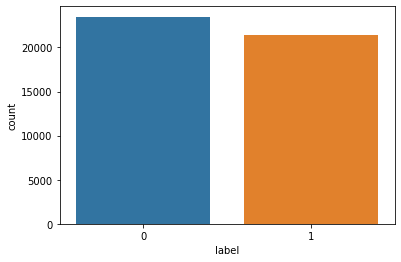

In [ ]:
sns.countplot(data["label"])
plt.show()

In [ ]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3112,Exclusive: Trump administration eyes hardening...,WASHINGTON (Reuters) - President Donald Trump’...,"June 20, 2017",1,0,0,0,0,0,0,1,0
533,"Even After Charlottesville, If You Hit Protes...",This year America has seen an interesting and ...,"August 18, 2017",0,0,0,1,0,0,0,0,0
15821,German police hunt shooter after man killed in...,BERLIN (Reuters) - Police in the northern Germ...,"November 2, 2017",1,0,0,0,0,0,0,0,1
8955,NRA Thugs Threaten Lawmakers With Bullets For...,As President Obama rolls out executive orders ...,"January 5, 2016",0,0,0,1,0,0,0,0,0
8066,Adidas FLAWLESSLY Trolls Anti-Gay Bigots Who ...,"With marriage equality nationwide, and with mo...","February 16, 2016",0,0,0,1,0,0,0,0,0


In [ ]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 3112 to 14484
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 2.7+ MB


In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
new_text = []
for txt in data.text:
  txt=wordopt(txt)
  new_text.append(txt)
new_text[0]

'wow  i was just getting ready to switch our tv  internet and phone service to comcast from at t  it looks like we ll be sticking with at t after all  it s interesting how many ceo s of major companies in america are not really all that interested in putting america first  trump s immigration policy  designed to protect our nation from future terror attacks  has shined a light on these ceo s and has made it possible for the american consumer to choose companies who take our national security seriously nbc s corporate parent  comcast  is joining the corporate backlash against president donald trump s popular immigration reform  partly prodded by the company s indian born chief technology officer  sree kotay the company provided employers at its philadelphia headquarters time off on thursday to protest trump s popular policy  which is designed to reduce the inflow of costly refugees and to exclude migrants carrying  hostile attitudes   company protests were also expected in washington d 

In [ ]:
new_title=[]
for txt in data.title:
  txt=wordopt(txt)
  new_title.append(txt)
new_title[0]

'comcast gives employees day off to protest trump s pro american immigration policy cto compares trump to venezuelan dictator hugo chavez'

In [ ]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


In [ ]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 19204 to 15186
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.0 MB


In [ ]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [ ]:
# Creating Y
y = data.label
print(y)
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)
print(x)

3112     1
533      0
15821    1
8955     0
8066     0
        ..
5481     1
22368    0
1220     0
22442    0
14484    0
Name: label, Length: 44898, dtype: int64
[['Exclusive: Trump administration eyes hardening line toward Pakistan'
  'WASHINGTON (Reuters) - President Donald Trump’s administration is exploring hardening its approach toward Pakistan to crack down on Pakistan-based militants launching attacks in neighboring Afghanistan, two U.S. officials tell Reuters.  Potential Trump administration responses being discussed include expanding U.S. drone strikes, redirecting or withholding some aid to Pakistan and perhaps eventually downgrading Pakistan’s status as a major non-NATO ally, the two officials said, speaking on condition of anonymity. Other U.S. officials are skeptical of the prospects for success, arguing that years of previous U.S. efforts to curb Pakistan’s support for militant groups have failed, and that already strengthening U.S. ties to India, Pakistan’s arch-enemy, u

In [ ]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [ ]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


In [ ]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        #creating layers
        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000 #forward 5008 backward 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

In [ ]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in range(EPOCHS):

    # Clearing gradients
    optimizer.zero_grad()

    # Forward Propagation
    outs = model(X_train)

    # Computing Loss
    loss = error(outs,Y_train)

    # Backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 0.7133815884590149
Loss after iteration 1 is 7.4492926597595215
Loss after iteration 2 is 1.1282269954681396
Loss after iteration 3 is 0.6945059895515442
Loss after iteration 4 is 0.6750882863998413
Loss after iteration 5 is 0.6094121932983398
Loss after iteration 6 is 0.554080605506897
Loss after iteration 7 is 0.478351354598999
Loss after iteration 8 is 0.4033137261867523
Loss after iteration 9 is 0.35135942697525024
Loss after iteration 10 is 0.3187730014324188
Loss after iteration 11 is 0.29958197474479675
Loss after iteration 12 is 0.28006690740585327
Loss after iteration 13 is 0.26598837971687317
Loss after iteration 14 is 0.27095672488212585
Loss after iteration 15 is 0.25782081484794617
Loss after iteration 16 is 0.25473660230636597
Loss after iteration 17 is 0.24097312986850739
Loss after iteration 18 is 0.25073328614234924
Loss after iteration 19 is 0.230716273188591


# New Section

In [ ]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

tensor([-0.3010,  0.2236], grad_fn=<SelectBackward0>)
tensor(1)
Model accuracy is  0.9873496659242762
